In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
plt.style.use('fivethirtyeight')

# Example: Describing 3D circular motion

In this example, a particle is traveling in a circle around an axis set to $\hat{e}_{rot} = -\frac{1}{\sqrt{2}}\hat{i}+\frac{1}{\sqrt{2}}\hat{k}$. 

I create a rotation: $R_1$ to rotate the unit vector around the $\hat{j}$-axis by $45^o$. 

I want to rotate the starting position of the position by $60^o$ so the particle didn't start along one of the axes. This rotation is $R_2$. 

In [3]:
alpha = np.pi/4; R1 = np.array([[np.cos(alpha), 0, -np.sin(alpha)],
                                [0,1,0],
                                [np.sin(alpha), 0, np.cos(alpha)]])
beta = np.pi/3; R2 = np.array([[np.cos(beta), -np.sin(beta), 0],
                               [np.sin(beta), np.cos(beta), 0],
                               [0,0,1]])

Next, I define the angle to go through one cycle,`a=` $\theta=0-2\pi$ and defined the $r'$ and $v'$ vectors. 

In [4]:
a = np.linspace(0,2*np.pi)
rp = np.array([np.sin(a), np.cos(a), np.zeros(a.shape)])
vp = np.array([np.cos(a), -np.sin(a), np.zeros(a.shape)])

Rotating $\mathbf{r}'$ and $\mathbf{v}'$ to the desired coordinates required multiplying the rotation matrices as such

* $\mathbf{r} = \mathbf{R_1R_2r}'$
* $\mathbf{v} = \mathbf{R_1R_2v}'$

In [5]:
r = rp.copy()
v = vp.copy()
for i in range(0,len(a)):
    r[:,i] = R1@R2@rp[:,i]
    v[:,i] = R1@R2@vp[:,i]

Then, I print out the values for $\mathbf{r}(0)$, $\mathbf{v}(0)$, and $\mathbf{h}(0)$

In [11]:
print(1*r[:,0])
print(1*v[:,0])
h = np.cross(r[:,0],v[:,0])
print(h)

[-0.61237244  0.5        -0.61237244]
[0.35355339 0.8660254  0.35355339]
[ 0.70710678  0.         -0.70710678]


Finally, to give context I plot the motion of the object with the three vectors plotted

* $\mathbf{r}(0)$: red 
* $\mathbf{v}(0)$: blue
* $\mathbf{h}(0)$: black

Text(0.5, 0, 'z-position (m)')

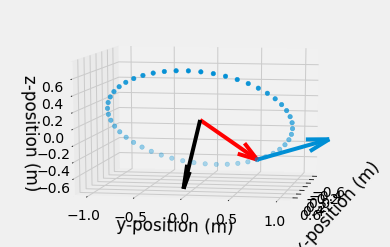

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(r[0,:],r[1,:],r[2,:])
Q1 = ax.quiver(r[0,0],r[1,0],r[2,0], v[0,0],v[1,0],v[2,0])
Q2 = ax.quiver(0,0,0, r[0,0],r[1,0],r[2,0],color='red')
Q3 = ax.quiver(0,0,0,h[0],h[1],h[2],color='black')
ax.view_init(elev=10., azim=10)
ax.set_xlabel('x-position (m)')
ax.set_ylabel('y-position (m)')
ax.set_zlabel('z-position (m)')

In [17]:
from matplotlib import animation
from IPython.display import HTML

1. Create a figure to display the animation and add fixed background _the dashed line is added to show the path the end point takes_

2. Create an initializing (`init`) function that clears the previous line and marker

In [18]:
def init():
    Q1.set_UVC([], [], [])
    Q2.set_UVC([], [], [])
    Q3.set_UVC([], [], [])
    return (Q1, Q2, Q3,)

3. Create an animating (`animate`) function that updates the line

In [20]:
def animate(i):
    '''function that updates the line and marker data
    arguments:
    ----------
    i: index of timestep
    outputs:
    --------
    line: the line object plotted in the above ax.plot(...)
    marker: the marker for the end of the 2-bar linkage plotted above with ax.plot('...','o')'''
    Q1.set_UVC = ax.quiver(r[0,i],r[1,i],r[2,i], v[0,i],v[1,i],v[2,i])
    Q2.set_UVC = ax.quiver(0,0,0, r[0,i],r[1,i],r[2,i],color='red')
    h = np.cross(r[:,i],v[:,i])
    Q3.set_UVC = ax.quiver(0,0,0,h[0],h[1],h[2],color='black')
    return (Q1, Q2, Q3, )

4. Create an animation (`anim`) variable using the `animation.FuncAnimation`

In [21]:
anim = animation.FuncAnimation(fig, animate, #init_func=init,
                               frames=range(0,len(a)), interval=100, 
                               blit=False)

In [22]:
HTML(anim.to_html5_video())